In [15]:
from nanopyx.core.transform.interpolation_bicubic import Interpolator
from nanopyx.core.analysis.registration import Registration
from nanopyx.core.generate.noise_add_squares import get_squares

import numpy as np
from matplotlib import pyplot as plt


In [16]:
image_1 = get_squares(256,256,nSquares=10)

image_2 = Interpolator(image_1).shift(10,10)
image_2 = Interpolator(image_2).scale_xy(1.3,1.3)
image_2 = Interpolator(image_2).rotate(1.5)

In [17]:
Reg = Registration(image_1, image_2)
image_fixed = Reg.scaling_rotation_translation()

print(f"Angle: {np.rad2deg(Reg.reg_result['Rotation']):.2f}",flush=True)
print(f"Scaling {Reg.reg_result['Scaling']:.2f}", flush=True)
print(f"Shift (y,x): ({Reg.reg_result['Translation'][0]:.2f}, {Reg.reg_result['Translation'][1]:.2f})", flush=True)


Angle: 85.34
Scaling 1.30
Shift (y,x): (-10.37, 12.50)


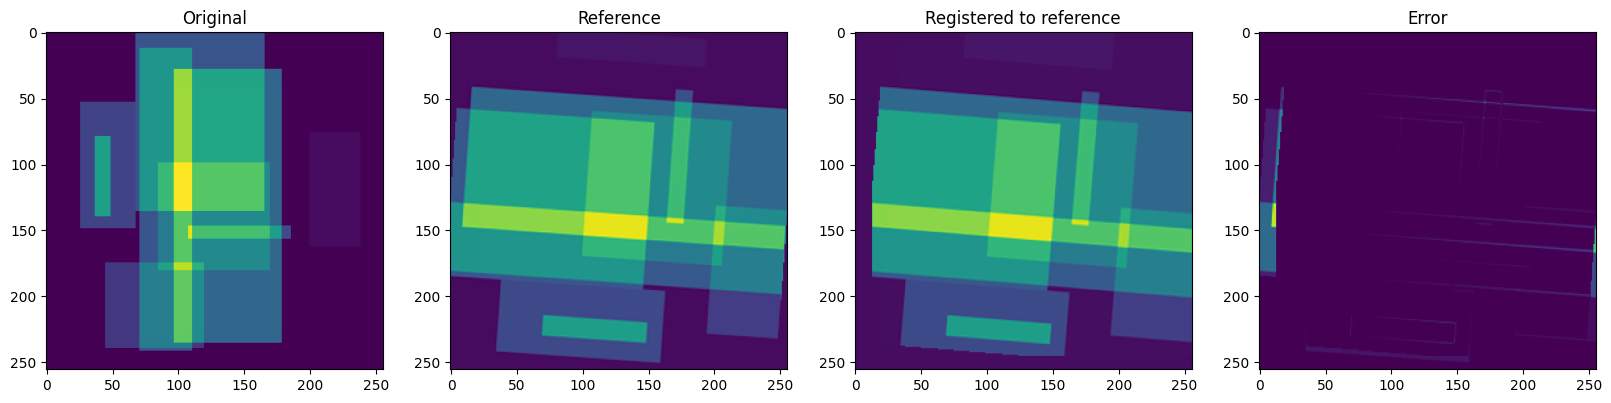

In [18]:
plt.close('all')
fig, axs = plt.subplots(1,4, figsize=(20,9))

axs[0].imshow(image_1)
axs[0].set_title("Original")

axs[1].imshow(image_2)
axs[1].set_title("Reference")

axs[2].imshow(image_fixed)
axs[2].set_title("Registered to reference")

axs[3].imshow((image_2-image_fixed)**2)
axs[3].set_title("Error")

plt.show()

In [19]:
Reg_2 = Registration(image_fixed, image_2)
image_fixed_2 = Reg_2.scaling_rotation_translation()

print(f"Angle: {np.rad2deg(Reg_2.reg_result['Rotation']):.2f}",flush=True)
print(f"Scaling {Reg_2.reg_result['Scaling']:.2f}", flush=True)
print(f"Shift (y,x): ({Reg_2.reg_result['Translation'][0]:.2f}, {Reg_2.reg_result['Translation'][1]:.2f})", flush=True)


Angle: -0.07
Scaling 1.00
Shift (y,x): (-1.41, -1.83)


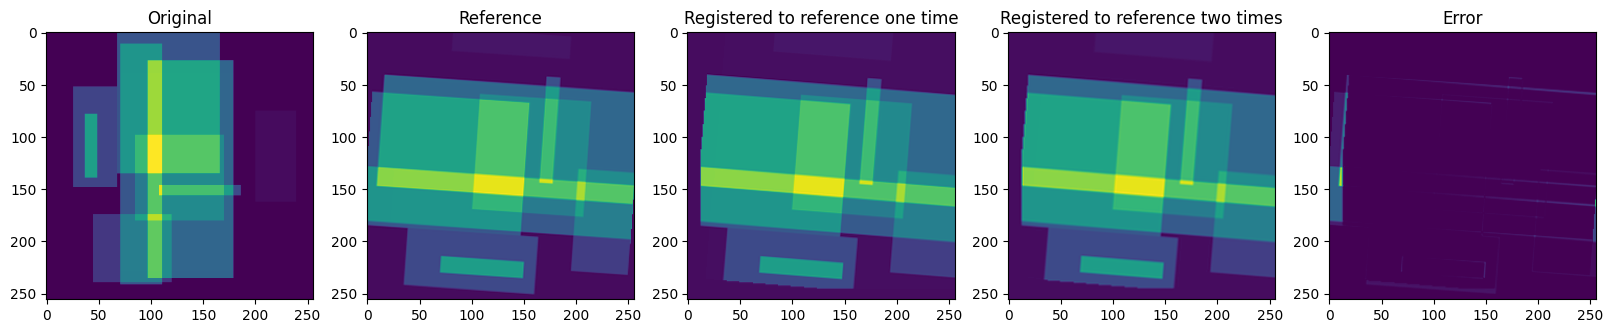

In [20]:
plt.close('all')
fig, axs = plt.subplots(1,5, figsize=(20,9))

axs[0].imshow(image_1)
axs[0].set_title("Original")

axs[1].imshow(image_2)
axs[1].set_title("Reference")

axs[2].imshow(image_fixed)
axs[2].set_title("Registered to reference one time")

axs[3].imshow(image_fixed_2)
axs[3].set_title("Registered to reference two times")

axs[4].imshow((image_2-image_fixed_2)**2)
axs[4].set_title("Error")

plt.show()